In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

In [3]:
# Display basic information about the dataset
display(df.head())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


None

Part 1: Analysis & Visualization

<ipython-input-5-89623aebb9ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette="coolwarm")


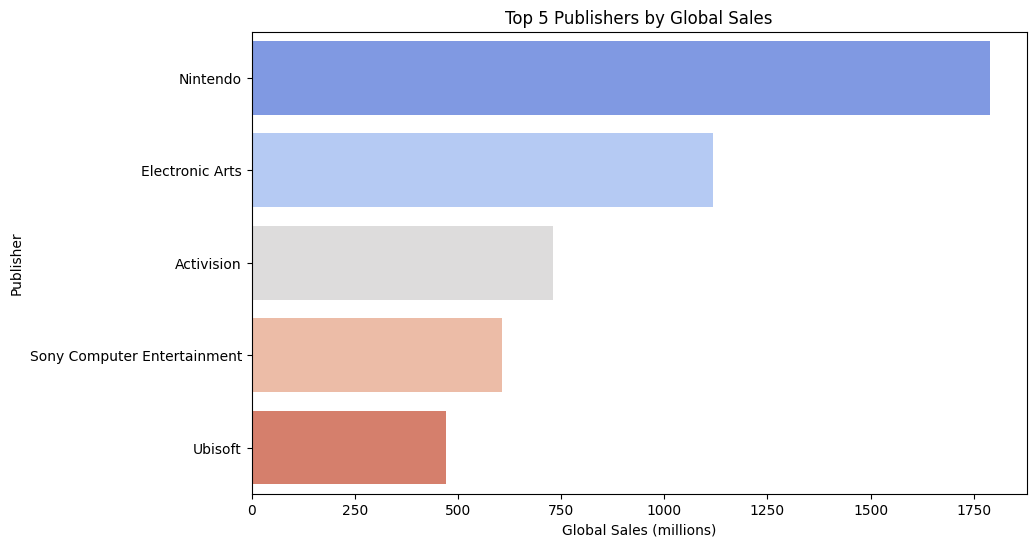

In [5]:
## 1. Top 5 Publishers by Global Sales
publisher_sales = df.groupby("Publisher")["Global_Sales"].sum().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette="coolwarm")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Publisher")
plt.title("Top 5 Publishers by Global Sales")
plt.show()

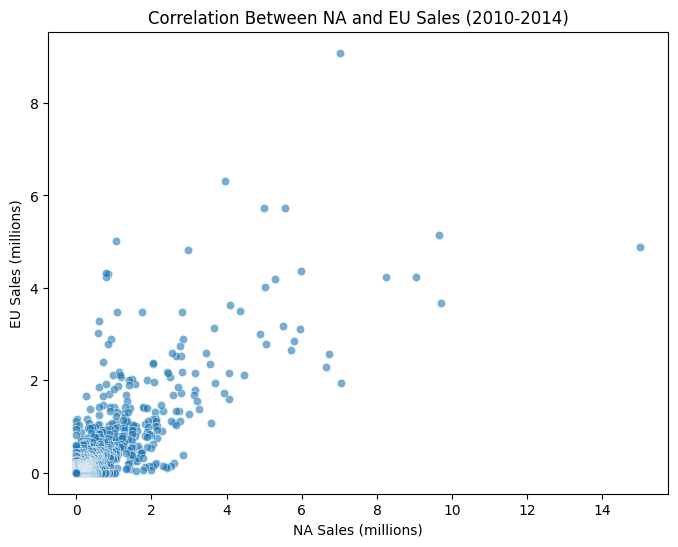

In [6]:
## 2. Correlation between NA and EU sales (2010-2014)
# Assuming the column name is 'Year_of_Release' instead of 'year_of_release'
df_filtered = df[(df["Year_of_Release"] >= 2010) & (df["Year_of_Release"] <= 2014)]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_filtered["NA_Sales"], y=df_filtered["EU_Sales"], alpha=0.6)
plt.xlabel("NA Sales (millions)")
plt.ylabel("EU Sales (millions)")
plt.title("Correlation Between NA and EU Sales (2010-2014)")
plt.show()

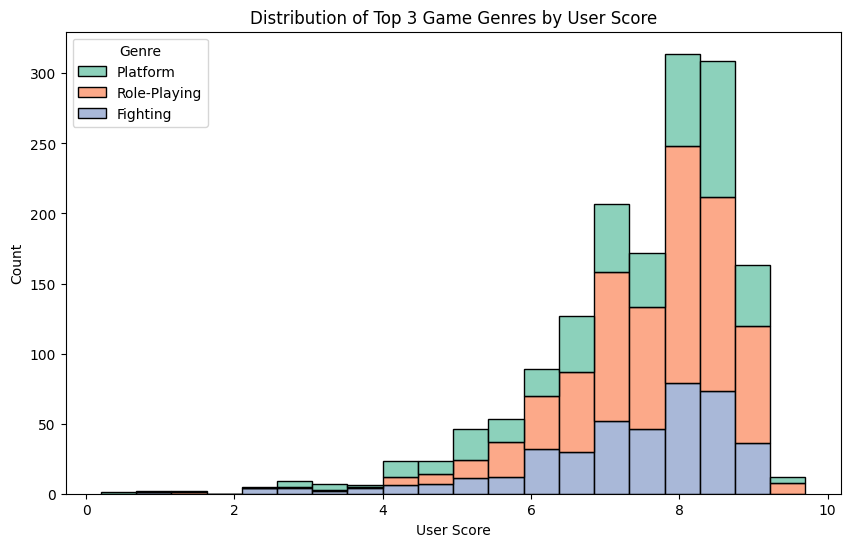

In [7]:
## 3. Distribution of the 3 Most Popular Genres (by User Score)
# Assuming user scores exist, select top genres
# Convert 'User_Score' to numeric, handling errors
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
top_genres = df.groupby("Genre")["User_Score"].mean().nlargest(3).index
df_top_genres = df[df["Genre"].isin(top_genres)]
plt.figure(figsize=(10, 6))
sns.histplot(df_top_genres, x="User_Score", hue="Genre", multiple="stack", palette="Set2", bins=20)
plt.xlabel("User Score")
plt.ylabel("Count")
plt.title("Distribution of Top 3 Game Genres by User Score")
plt.show()

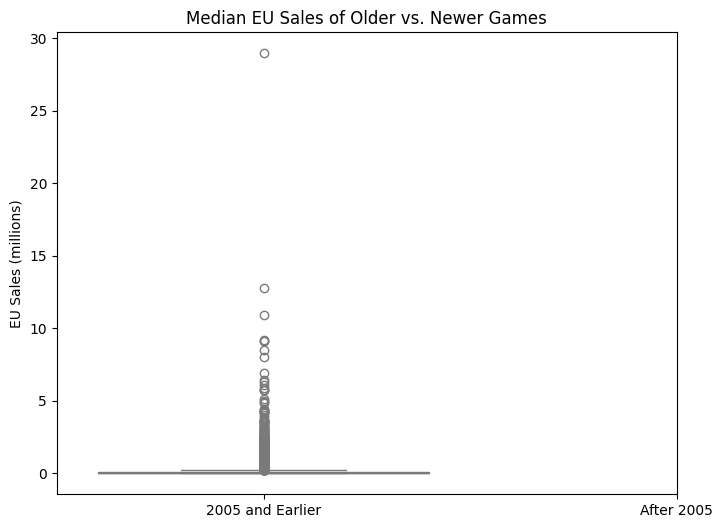

In [8]:
## 4. Do Older Games (2005 and earlier) have a Higher Median EU Sales?
# Replace 'Year' with the actual column name containing year information, likely 'Year_of_Release'
old_games = df[df["Year_of_Release"] <= 2005]
new_games = df[df["Year_of_Release"] > 2005]
plt.figure(figsize=(8, 6))
sns.boxplot(data=[old_games["EU_Sales"], new_games["EU_Sales"]], palette="pastel")
plt.xticks([0, 1], ["2005 and Earlier", "After 2005"])
plt.ylabel("EU Sales (millions)")
plt.title("Median EU Sales of Older vs. Newer Games")
plt.show()

<ipython-input-9-dd26c53e7532>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_developers.values, y=top_developers.index, palette="viridis")


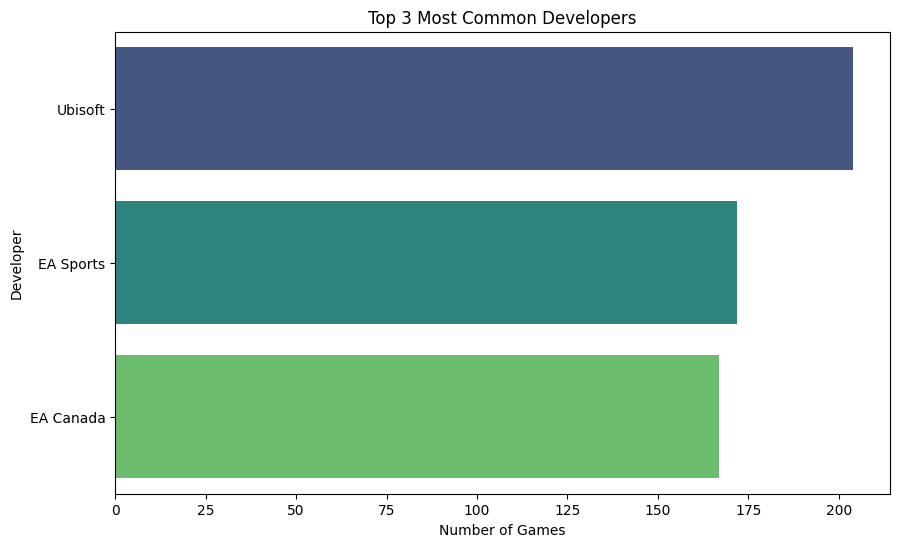

In [9]:
## 5. Three Most Common Developers
top_developers = df["Developer"].value_counts().nlargest(3)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_developers.values, y=top_developers.index, palette="viridis")
plt.xlabel("Number of Games")
plt.ylabel("Developer")
plt.title("Top 3 Most Common Developers")
plt.show()